<a href="https://colab.research.google.com/github/kabeerbora/cs_ls/blob/main/cs_ls_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Upload Data


In [2]:
df_total = pd.read_excel('/content/drive/MyDrive/Bora-Sarangi/allstates_allvariables.xlsx', sheet_name = 'all_added')
df_total = df_total[df_total['ind_code'] == 'Total']
df_total['year'] = df_total['year'].astype(str).str.split('-').str[0]
df_total
df = pd.read_excel('/content/drive/MyDrive/Bora-Sarangi/price_indices.xlsx')

# Merge Data

In [3]:
df_total['year'] = df_total['year'].astype(int)
df['year'] = df['year'].astype(int)
df_total = df_total.groupby('year', as_index=False).sum()
df = df.groupby('year', as_index=False).sum()
df_total
df_total = pd.merge(df_total, df, on='year', how='outer')

#Creating Variables

In [4]:
df_total['real_wage_cpi'] = (df_total['Wages and Salaries - Workers'] * 1000) / df['cpi_iw']
df_total['real_wage_wpi'] = (df_total['Wages and Salaries - Workers'] * 1000) / df['wpi']
df_total
df_total['avg_prod_cpi'] = (df_total['Net Value Added'] * 1000) / (df_total['Number of Workers'] * df_total['cpi_iw'])
df_total['avg_prod_wpi'] = (df_total['Net Value Added'] * 1000) / (df_total['Number of Workers'] * df_total['wpi'])
df_total['real_wage_worker_cpi'] = (df_total['real_wage_cpi']) / df_total['Number of Workers']
df_total['real_wage_worker_wpi'] = (df_total['real_wage_wpi']) / df_total['Number of Workers']
df_total['labor_share'] = df_total['Wages and Salaries - Workers'] / df_total['Net Value Added']
df_total['contract_share'] = df_total['Number of Workers - Employed Through Contractors'] / df_total['Number of Workers']
df_total['divergence'] = df_total['Wages and Salaries - Workers']/df_total['Net Value Added']

In [5]:
### Creating delta variables


df_total['delta_ls_pct'] = df_total['labor_share'].pct_change() * 100
df_total['delta_cs_pct'] = df_total['contract_share'].pct_change() * 100

<ipython-input-5-8c04c18cb6f9>:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_total['delta_ls_pct'] = df_total['labor_share'].pct_change() * 100
<ipython-input-5-8c04c18cb6f9>:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_total['delta_cs_pct'] = df_total['contract_share'].pct_change() * 100


# Plotting variables

<Figure size 1200x600 with 0 Axes>

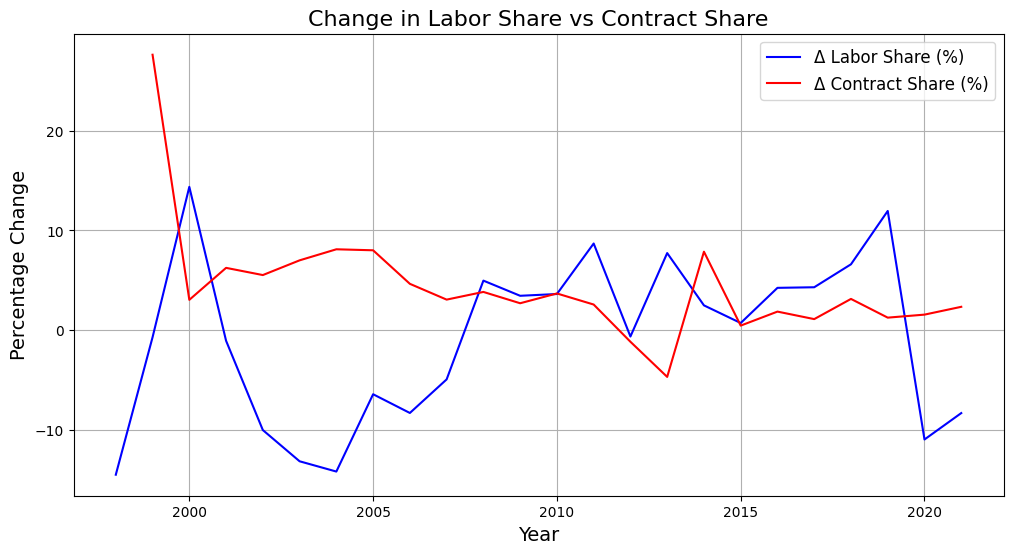

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_total is your DataFrame
df_plot = df_total[['year', 'delta_ls_pct', 'delta_cs_pct']].dropna()
df_plot = df_plot[(df_plot['delta_ls_pct'] != 0) & (df_plot['delta_cs_pct'] != 0)]

plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='delta_ls_pct', data=df_plot, label='Δ Labor Share (%)', color='blue')
sns.lineplot(x='year', y='delta_cs_pct', data=df_plot, label='Δ Contract Share (%)', color='red')

plt.title('Change in Labor Share vs Contract Share', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage Change', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

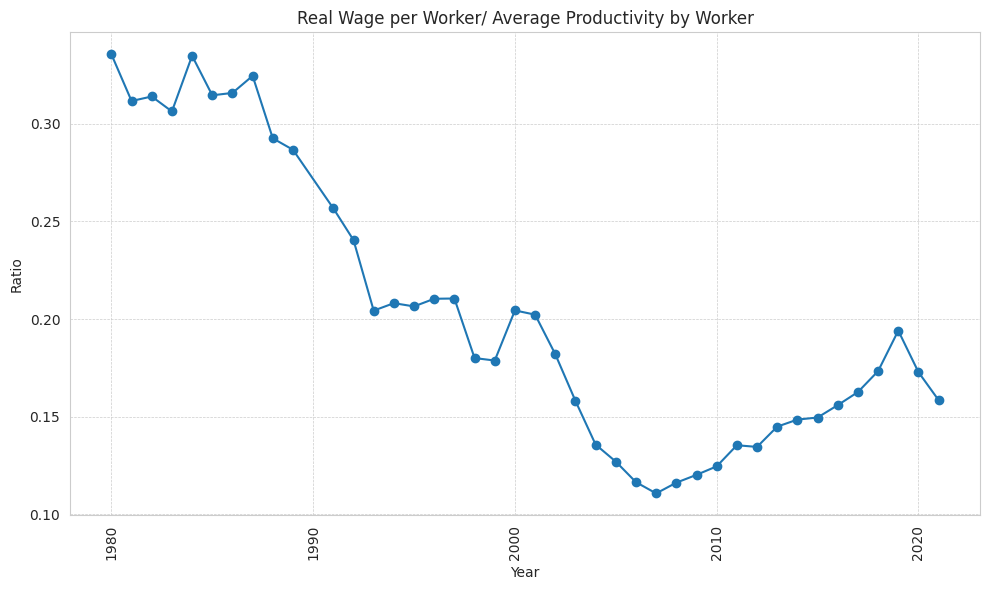

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_total is your DataFrame
df_plot = df_total[['year', 'divergence']].dropna()

plt.figure(figsize=(10, 6))
# Extract 'year' and 'divergence' columns as variables
year = df_plot['year']
divergence = df_plot['divergence']
plt.plot(year, divergence, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Real Wage per Worker/ Average Productivity by Worker')

# Add more gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5) # 'which' argument for major & minor grids

# Rotate x-axis labels for vertical orientation
plt.xticks(rotation='vertical')

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

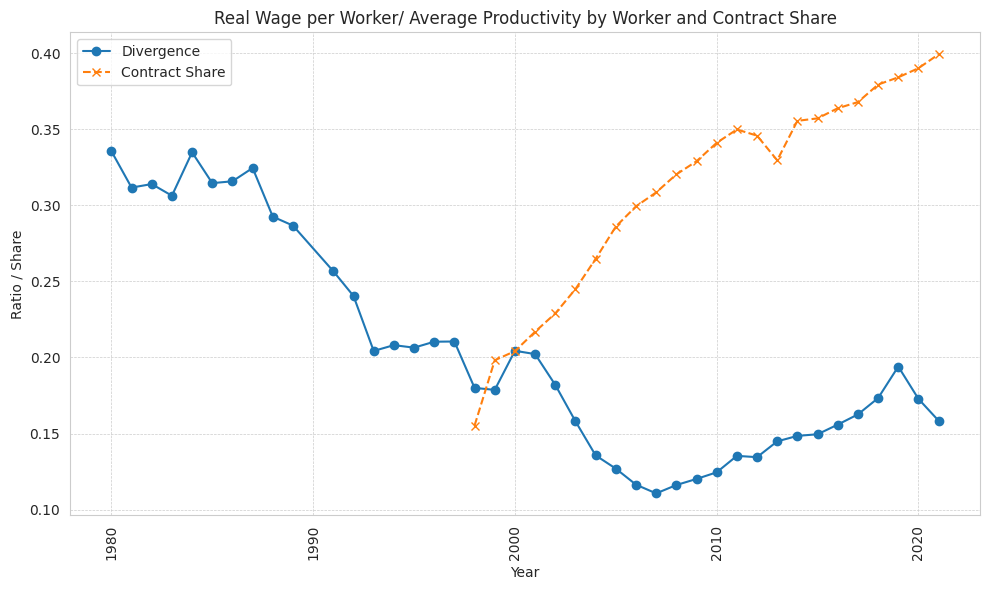

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_total is your DataFrame
df_plot = df_total[['year', 'divergence', 'contract_share']].dropna()

# Filter data for divergence (1980 onwards)
df_divergence = df_plot[df_plot['year'] >= 1980]

# Filter data for contract_share (1998 onwards)
df_contract_share = df_plot[df_plot['year'] >= 1998]

plt.figure(figsize=(10, 6))

# Plot 'divergence'
plt.plot(df_divergence['year'], df_divergence['divergence'], marker='o', linestyle='-', label='Divergence')

# Plot 'contract_share'
plt.plot(df_contract_share['year'], df_contract_share['contract_share'], marker='x', linestyle='--', label='Contract Share')

plt.xlabel('Year')
plt.ylabel('Ratio / Share')  # Updated y-axis label
plt.title('Real Wage per Worker/ Average Productivity by Worker and Contract Share') # Updated title

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation='vertical')
plt.legend()  # Add a legend to distinguish the lines

plt.tight_layout()
plt.show()